In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Dependencies
import requests
from pprint import pprint
import numpy as np
import gmaps
import json
import os
from scipy.stats import linregress
from datetime import datetime
import time

#import files
rain_path= "useable_csv/rainfall_data_88.csv"
deforestation_path = "useable_csv/sum_deforestation_data_88.csv"
#read csv
rain = pd.read_csv(rain_path)
deforestation = pd.read_csv(deforestation_path)

merged_df = pd.merge(rain, deforestation, on= "Year")

merged_df 



,Year,AC_mm,AM_mm,AP_mm,MA_mm,MT_mm,PA_mm,RR_mm,TO_mm,Total_Rain_mm,AC_km2,AM_km2,AP_km2,MA_km2,MT_km2,PA_km2,RR_km2,TO_km2,Total_Deforested_km2
0,1988,1805.70,2763.88,2591.0,1876.31,1397.67,2588.02,507.50,1727.30,15257.37,620,151,60,245,514,699,290,165,2978
1,1989,2345.10,2839.19,2925.7,1846.93,1328.27,2368.85,933.80,1959.40,16547.24,1160,269,190,387,1110,1274,920,895,6582
2,1990,1931.47,1761.98,2762.2,1275.92,1212.82,1924.91,NaN,1014.88,11884.19,1710,789,440,398,1512,1763,1070,1475,9701
3,1991,NaN,2138.00,2404.8,1513.06,800.75,2204.99,NaN,1047.54,10109.14,2090,1769,850,1068,1796,2141,1490,1915,13774
4,1992,NaN,1950.20,2202.7,1118.21,614.44,1591.29,NaN,1562.02,9038.86,2490,2568,886,2203,6470,5928,1771,2324,27560
5,1993,1735.30,2640.73,2291.9,1356.12,612.10,2097.16,726.40,794.80,12254.51,2972,2938,886,2575,7092,10212,2011,2657,36858
6,1994,2325.40,2611.13,2645.7,1825.53,783.70,2512.26,1183.90,587.45,14475.07,3454,3308,886,2947,7714,14496,2251,2990,46156
7,1995,1970.17,2406.28,2608.2,1728.05,1085.44,2293.80,1307.75,1653.52,15053.20,4662,5422,895,4692,18105,22341,2471,3787,70958
8,1996,2046.87,2636.23,2589.7,1802.13,NaN,2201.31,2190.35,1427.27,14893.86,5095,6445,895,5753,24648,28476,2685,4107,89119
9,1997,1956.87,2392.39,2461.7,1366.84,194.60,1890.37,1295.55,1797.95,13356.26,5453,7034,913,6162,29919,32615,2869,4380,102346


<function matplotlib.pyplot.show(close=None, block=None)>

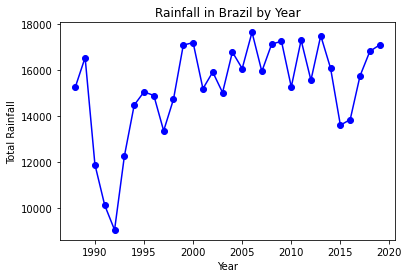

In [2]:
plt.plot(merged_df['Year'], merged_df['Total_Rain_mm'], marker='o', color = 'b')

plt.xlabel("Year")
plt.ylabel("Total Rainfall")
plt.title("Rainfall in Brazil by Year")
plt.show

In [ ]:
plt.plot(merged_df['Year'], merged_df['Total_Rain_mm'], marker='o', color = 'b')

plt.xlabel("Year")
plt.ylabel("Total Deforestation")
plt.title("Deforestation in Brazil by Year")
plt.show
